In [3]:
pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pygame 
import random

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


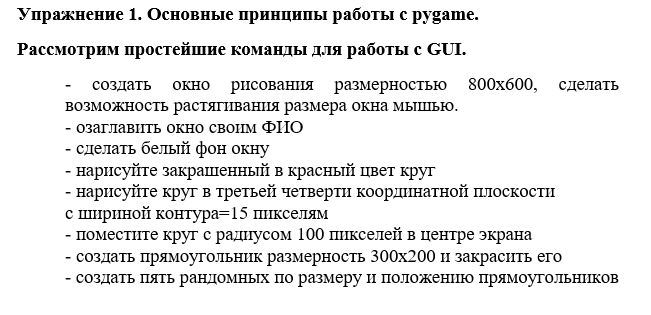

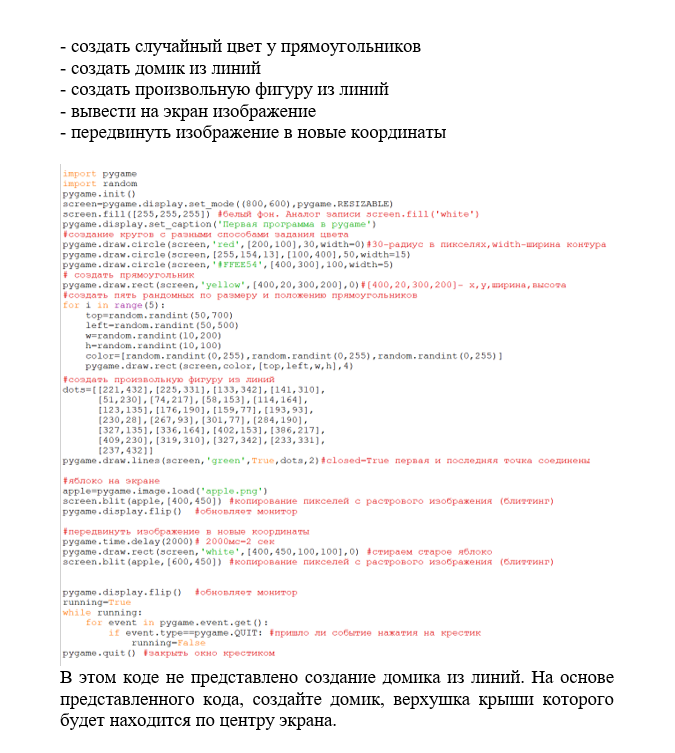

In [ ]:
pygame.init()
screen=pygame.display.set_mode((800,600),pygame.RESIZABLE)
screen.fill([255,255,255]) # формат фона. Альтернативная запись screen.fill('white')
pygame.display.set_caption('Первая программа в pygame')

# создание кругов с разными способами задания цвета
pygame.draw.circle(screen,'red',[200,100],30,width=0) #30-радиус в пикселях,width-ширина контура
pygame.draw.circle(screen,[255,154,131],[100,400],50,width=15)
pygame.draw.circle(screen,'#FFEE54',[400,300],100,width=5)

# создать прямоугольник
pygame.draw.rect(screen,'yellow',[400,20,300,200],0) #[400,20,300,200]- x,y,ширина,высота

# pygame.mxp.palucusius по размеру и положению прямоугольников
for i in range(5):
    top=random.randint(50,700)
    left=random.randint(50,500)
    w=random.randint(10,200)
    h=random.randint(10,100)
    color=[random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    pygame.draw.rect(screen,color,[top,left,w,h],4)

# создать произвольную фигуру из линий
dots=[[221,432],[225,331],[133,342],[141,310],
    [51,230],[74,217],[58,153],[114,164],
    [123,135],[176,190],[159,77],[193,93],
    [230,28],[267,93],[301,77],[284,190],
    [327,135],[336,164],[402,153],[386,217],
    [409,230],[319,310],[327,342],[233,331],
    [237,432]]

pygame.draw.lines(screen,'green',True,dots,2) #closed=True первая и последняя точка соединены

# яблоко на экране
apple=pygame.image.load('apple.png')
screen.blit(apple,[400,450]) # копирование пикселей с растрового изображения (битблит)
pygame.display.flip() # обновляет монитор

# переместить изображение в новые координаты
pygame.time.delay(2000) # 2000мс=2 сек
pygame.draw.rect(screen,'white',[400,450,100,100],0) # стираем старое яблоко
screen.blit(apple,[600,450]) # копирование пикселей с растрового изображения (битблит)

# Создаем домик с крышей в центре экрана
# Координаты крыши (треугольник)
roof_points = [
    [400, 200],  # вершина крыши (центр экрана по X)
    [300, 300],  # левый нижний угол крыши
    [500, 300]   # правый нижний угол крыши
]
# Рисуем крышу (треугольник)
pygame.draw.polygon(screen, (139, 69, 19), roof_points)  # коричневый цвет в RGB

# Рисуем основу домика (прямоугольник)
pygame.draw.rect(screen, (70, 130, 180), [300, 300, 200, 150], 0)  # x,y,ширина,высота (цвет steel blue)

# Рисуем окно
pygame.draw.rect(screen, (255, 255, 0), [350, 350, 50, 50], 0)  # желтое окно
pygame.draw.rect(screen, (0, 0, 0), [350, 350, 50, 50], 2)  # рамка окна

# Рисуем дверь
pygame.draw.rect(screen, (139, 0, 0), [430, 380, 40, 70], 0)  # красная дверь

# Обновляем экран
pygame.display.flip()

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
pygame.quit()

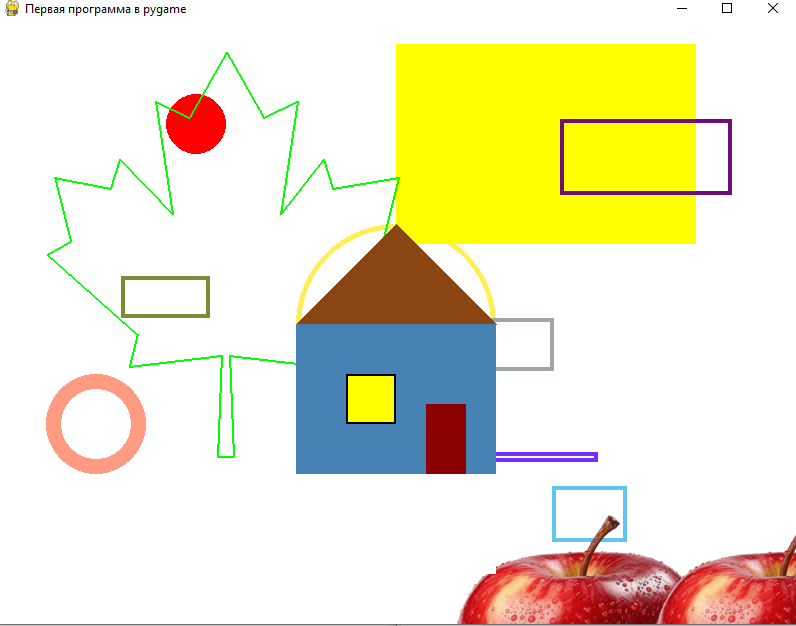

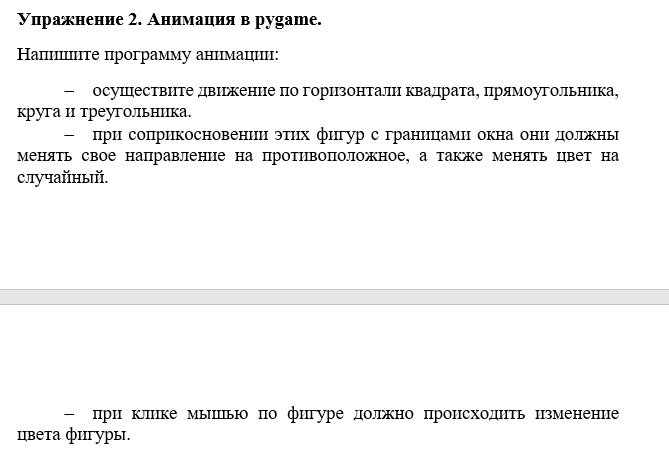

In [10]:
# Инициализация pygame
pygame.init()

# Параметры экрана
WIDTH, HEIGHT = 800, 600  # ширина и высота окна
screen = pygame.display.set_mode((WIDTH, HEIGHT))  # создание окна
pygame.display.set_caption("Анимация фигур в Pygame")  # заголовок окна

# Функция для генерации случайного цвета RGB
def random_color():
    # Возвращает кортеж из трех случайных чисел от 0 до 255
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Класс для движущихся фигур
class MovingShape:
    def __init__(self, shape, x, y, width, height, color):
        # Инициализация параметров фигуры:
        self.shape = shape  # тип фигуры (square, rectangle, circle, triangle)
        self.x = x  # координата X верхнего левого угла
        self.y = y  # координата Y верхнего левого угла
        self.width = width  # ширина фигуры
        self.height = height  # высота фигуры
        self.color = color  # цвет фигуры
        self.speed = 3  # скорость перемещения
        self.direction = 1  # направление: 1 - вправо, -1 - влево

    def move(self):
        # Перемещение фигуры
        self.x += self.speed * self.direction
        
        # Проверка на столкновение с границами экрана
        if self.x <= 0 or self.x + self.width >= WIDTH:
            self.direction *= -1  # изменение направления
            self.color = random_color()  # смена цвета при столкновении

    def draw(self):
        # Отрисовка фигуры в зависимости от её типа
        if self.shape == "square":
            pygame.draw.rect(screen, self.color, (self.x, self.y, self.width, self.height))
        elif self.shape == "rectangle":
            pygame.draw.rect(screen, self.color, (self.x, self.y, self.width, self.height))
        elif self.shape == "circle":
            # Для круга рисуем окружность с центром в середине прямоугольника
            pygame.draw.circle(screen, self.color, 
                              (self.x + self.width // 2, self.y + self.height // 2), 
                              self.width // 2)
        elif self.shape == "triangle":
            # Треугольник определяется тремя точками
            points = [
                (self.x, self.y + self.height),  # левая нижняя точка
                (self.x + self.width, self.y + self.height),  # правая нижняя
                (self.x + self.width // 2, self.y)  # верхняя средняя
            ]
            pygame.draw.polygon(screen, self.color, points)

    def check_click(self, pos):
        # Проверка, была ли нажата фигура (pos - координаты клика)
        if self.shape == "circle":
            # Для круга проверяем расстояние до центра
            dx = pos[0] - (self.x + self.width // 2)
            dy = pos[1] - (self.y + self.height // 2)
            if dx ** 2 + dy ** 2 <= (self.width // 2) ** 2:
                self.color = random_color()  # меняем цвет при клике
        else:
            # Для других фигур проверяем попадание в прямоугольник
            if (self.x <= pos[0] <= self.x + self.width and 
                self.y <= pos[1] <= self.y + self.height):
                self.color = random_color()

# Создание фигур (экземпляров класса MovingShape)
shapes = [
    MovingShape("square", 50, 100, 50, 50, random_color()),
    MovingShape("rectangle", 200, 200, 100, 50, random_color()),
    MovingShape("circle", 400, 300, 50, 50, random_color()),
    MovingShape("triangle", 600, 400, 60, 60, random_color())
]

# Основные параметры игры
running = True  # флаг работы программы
clock = pygame.time.Clock()  # объект для контроля FPS

# Главный игровой цикл
while running:
    # Заливка фона белым цветом
    screen.fill("white")
    
    # Обработка событий
    for event in pygame.event.get():
        if event.type == pygame.QUIT:  # если нажали закрыть окно
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN:  # если был клик мышью
            for shape in shapes:
                shape.check_click(event.pos)  # проверяем клик для каждой фигуры
    
    # Обновление и отрисовка всех фигур
    for shape in shapes:
        shape.move()  # перемещаем фигуру
        shape.draw()  # рисуем фигуру
    
    pygame.display.flip()
    # Ограничение FPS до 60 кадров в секунду
    clock.tick(60)

pygame.quit()